In [2]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


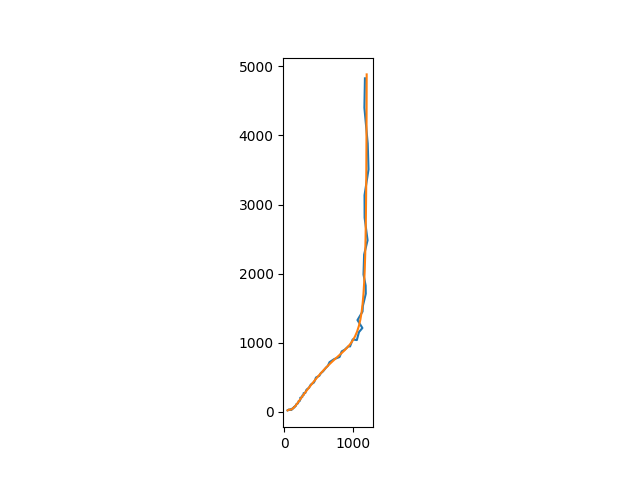

In [28]:
freq_list=np.logspace(-1,4,100)
#parameter for the TLM
Q=6.61e-4
alpha=1

R1=1000
delta1=0.12
R2=2000
delta2=0.17
R3=2.15*194.5


#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=40
Rrxn=40
Qdl=1e-6
alpha2=1

cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")
zexp=cmodel.predict(frequencies=freq_list)
zexp_noise=np.real(zexp)+np.random.normal(0,0.01,(len(zexp)))*np.real(zexp)+(np.imag(zexp)+np.random.normal(0,0.02,(len(zexp)))*np.imag(zexp))*1j
fig, ax =plt.subplots()
# ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2])
ax.plot(np.real(zexp_noise),-np.imag(zexp_noise))
ax.plot(np.real(zexp),-np.imag(zexp))
ax.set_aspect("equal")

In [30]:
#initial guesses for the TLM
#Double layer Capacitance inside porous electrode
Q=6.61e-4
alpha=1

R1=400
delta1=0.3
R2=400

R3=400
delta2=0.3


#initial guesses for the HFR intercept and for any semicircle like features in the EIS data
Rhfr=200
Rrxn=200
Qdl=6.61e-4
alpha2=1

#other (for arbitrary tortuosity profile)
Rref=200
a=4
b=5

cmodel1=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha,Rhfr,Rrxn,Qdl,alpha2],circuit="TLMtwo_1-R_1-p(R_2,CPE_1)")

In [36]:
#wt="unit"
wt="mod"
#wt="prop"

def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))

cmodel1.fit(impedance=zexp_noise,frequencies=freq_list,sigma=give_weights(zexp,wt),bounds=[(0,0,0,0,0,0,0,0,0.5),(np.inf,np.inf,np.inf,1,np.inf,np.inf,np.inf,np.inf,1)])

zfit=cmodel1.predict(frequencies=freq_list)

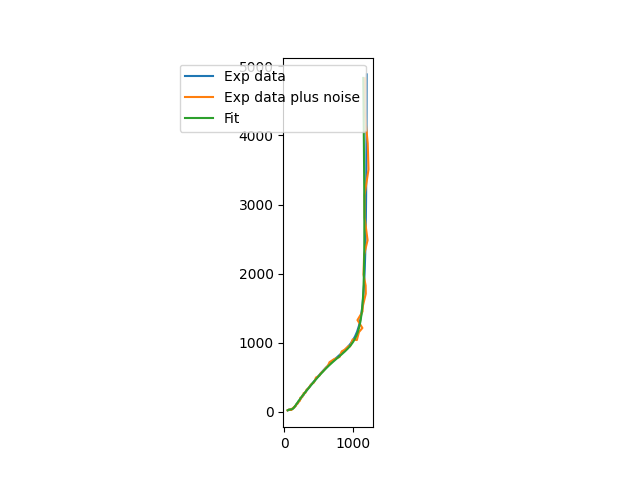

In [40]:
fig1, ax1 =plt.subplots()
ax1.plot(np.real(zexp),-np.imag(zexp),label="Exp data")
ax1.plot(np.real(zexp_noise),-np.imag(zexp_noise),label="Exp data plus noise")
ax1.plot(np.real(zfit),-np.imag(zfit),label="Fit")
ax1.legend()
ax1.set_aspect("equal")

In [33]:
print(cmodel1)


Circuit string: TLMtwo_1-R_1-p(R_2,CPE_1)
Fit: True

Initial guesses:
  TLMtwo_1_0 = 4.00e+02 [Ohm]
  TLMtwo_1_1 = 2.64e-01 [Ohm F]
  TLMtwo_1_2 = 2.64e-01 [Ohm F]
  TLMtwo_1_3 = 3.00e-01 []
  TLMtwo_1_4 = 1.00e+00 []
    R_1 = 2.00e+02 [Ohm]
    R_2 = 2.00e+02 [Ohm]
  CPE_1_0 = 6.61e-04 [Ohm^-1 sec^a]
  CPE_1_1 = 1.00e+00 []

Fit parameters:
  TLMtwo_1_0 = 1.23e+02  (+/- 1.39e+02) [Ohm]
  TLMtwo_1_1 = 8.16e-02  (+/- 9.18e-02) [Ohm F]
  TLMtwo_1_2 = 1.26e+00  (+/- 1.69e-02) [Ohm F]
  TLMtwo_1_3 = 7.20e-02  (+/- 6.23e-03) []
  TLMtwo_1_4 = 9.97e-01  (+/- 5.77e-03) []
    R_1 = 1.89e+01  (+/- 4.81e+00) [Ohm]
    R_2 = 1.31e+02  (+/- 6.82e+00) [Ohm]
  CPE_1_0 = 7.88e-05  (+/- 3.72e-05) [Ohm^-1 sec^a]
  CPE_1_1 = 5.00e-01  (+/- 5.12e-02) []



In [16]:
a=np.random.normal(0,0.03)
a

-0.013505035916743083